# linear regression

### reg1dim1.py

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

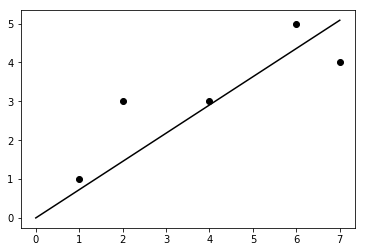

In [21]:
def reg1dim1(x, y):
    a = np.dot(x, y) / (x**2).sum()
    return a


x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])

a = reg1dim1(x, y)

plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color='k')

### reg1dim2.py

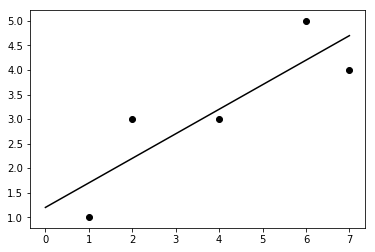

In [23]:
def reg1dim2(x, y):
    n = len(x)
    a = ((np.dot(x, y) - y.sum() * x.sum() / n) /
         ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum()) / n
    return a, b

a,b = reg1dim2(x, y)

plt.scatter(x, y, color='k')
xmax = x.max()
plt.plot([0, xmax], [b, a * xmax + b], color='k')

### linearreg.py

In [25]:
from scipy import linalg

In [29]:
class LinearRegression:
    def __init__(self):
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [32]:
from mpl_toolkits.mplot3d import axes3d

coefficient:  [1.11450326 1.95737004 3.00295751]
predicted value for (1, 1):  [6.07483081]


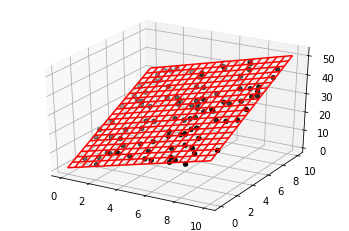

In [33]:
n = 100
scale = 10

np.random.seed(0)
X = np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0 + w1 * X[:, 0] + w2 * X[:, 1] + np.random.randn(n)

model = LinearRegression()
model.fit(X, y)

print("coefficient: ", model.w_)
print("predicted value for (1, 1): ",
     model.predict(np.array([1, 1])))

xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20),
                          np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + 
         model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')

### reg_winequality.py

In [34]:
import csv

In [38]:
# Loading the data
Xy = []
with open('./data/winequality-red.csv') as fp:
    for row in csv.reader(fp, delimiter=';'):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

# Split the data to train/test
np.random.seed(0)
np.random.shuffle(Xy)
train_X = Xy[:-1000, :-1]
train_y = Xy[:-1000, -1]
test_X = Xy[-1000:, :-1]
test_y = Xy[-1000:, -1]

# train the model
model = LinearRegression()
model.fit(train_X, train_y)

# predic fot the test data
y = model.predict(test_X)

print('five groud truth and predicted values:')
for i in range(5):
    print('{:1.0f} {:5.3f}'.format(test_y[i], y[i]))
print()
print("RMSE:", np.sqrt(((test_y - y)**2).mean()))

five groud truth and predicted values:
7 6.012
6 5.734
5 5.285
8 6.352
5 5.414

RMSE: 0.6724248548465871
